# Исследование данных о продаже игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Этапы**

*1 Общая информация о датасете*

*2 Предобработка*

* Найти, изучить и устранить пропущенные значения в столбцах где это возможно. * Преобразовать типы данных в столбцах.

*3 Исследовательский анализ данных*

* Определить актуальный период для анализа
* Определить лидеров по потенциальной прибыльности среди платформ и жанров
* определить влияние оценок критиков и пользователей на суммарные продажи

*4 Портрет пользователя каждого региона*
* Определить для каждого топ-5 платформ, жанров
* Определить влияние рейтинга ESRB на продажи в каждом регионе

*5 Проверка гипотез*
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

*6 Вывод*

### Общая информация о датасете. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


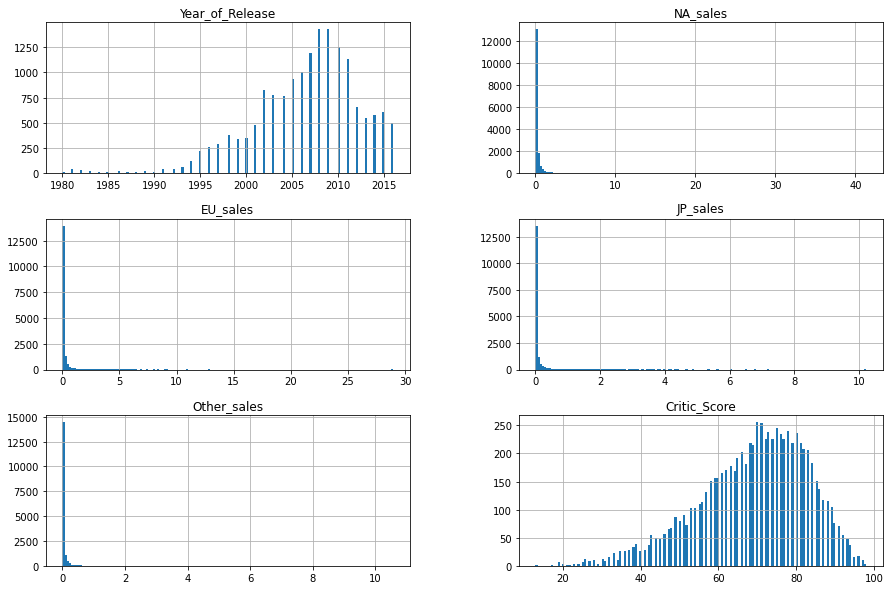

In [4]:
df.hist(figsize=(15,10), bins=150);

### Предобработка данных
#### Обработка значений

In [5]:
#df.columns = [col.lower() for col in df.columns]
df.columns = df.columns.str.lower()

In [6]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
df.dropna(subset=['name'], inplace=True)

In [10]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

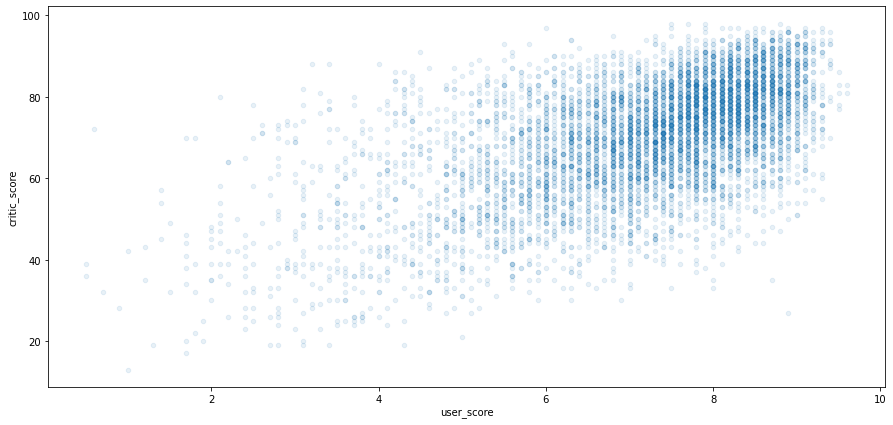

In [12]:
df.plot(kind='scatter', x='user_score', y='critic_score', alpha=0.1, figsize=(15,7))

In [13]:
df['rating'].fillna('unknown', inplace=True)

#### Выяснение причин пропусков

In [14]:
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,unknown
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,unknown
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [15]:
df[df['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,unknown
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,unknown
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,unknown
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,unknown
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,unknown


In [16]:
df[df['user_score'].isna()]['critic_score'].isna().sum()

8003

In [17]:
df[df['user_score'].isna()]['rating'].isna().sum()

0

In [18]:
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')
df_check = df.loc[:, ['year_of_release', 'sum_sales']]
df_check['user_score_is_na'] = df['user_score'].isna()
df_check.head()

,year_of_release,sum_sales,user_score_is_na
0,2006.0,82.54,False
1,1985.0,40.24,True
2,2008.0,35.52,False
3,2009.0,32.77,False
4,1996.0,31.38,True


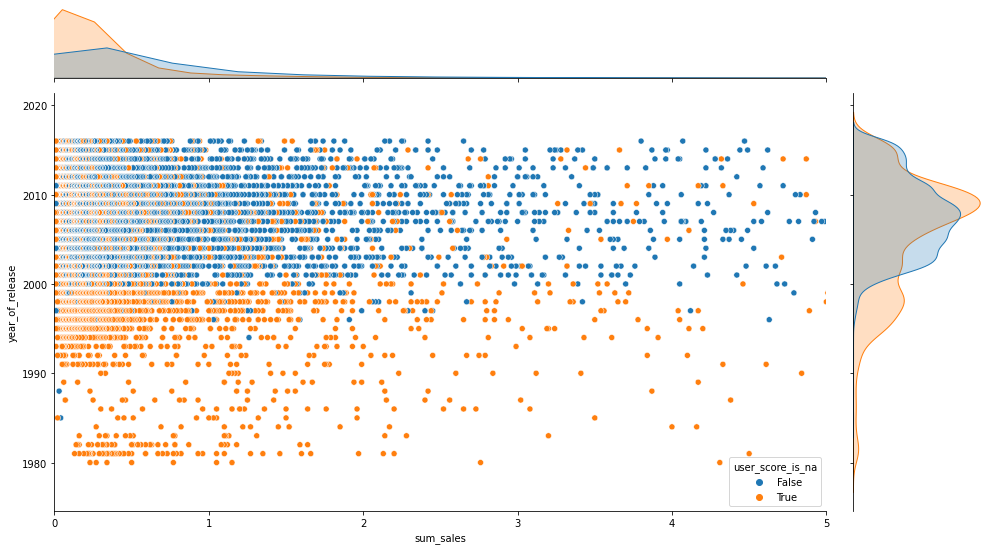

In [19]:
sns.jointplot(data=df_check, x="sum_sales", y="year_of_release", hue="user_score_is_na", xlim=(0,5))
plt.gcf().set_size_inches(15,8);

#### Поиск дубликатов

In [20]:
df.duplicated().sum()

0

In [21]:
df[['name', 'platform']].duplicated().sum()

4

In [22]:
df[df[['name', 'platform']].duplicated(keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48


In [23]:
df.drop(16230, inplace=True)

Need for Speed: Most Wanted выпускался в разные года и на разных платформах, удалять его не стоит
Madden NFL 13 Имеет дубликат с практичеси нулевыми продажами, эта строчка незначительна, можно ее удалить
Sonic the Hedgehog имеет пустое значение в годе выпуска, что не позволяет точно судить о том, дубль это, или какой-либо ремастер, лучше эту строчку оставить

**Вывод**

* Удалены строки с пропущенными значениями в `name`. Таких всего две - потеря не большая, зато теперь все строчки при желании можно проверить вручную, или спарсить параметры, как раз зная все названия.
* В колонке `user_score` заменены значения _tbd_ на `nan`.
* В колонке `rating` пропущенные значения заполнены значением *unknown*
* Заполнить пропуски в `user_score` по `critic_score` и наоборот - нельзя. Пареметры зависимы, однако разброс весьма велик. Основная возможная причина пропусков в этих колонках - ранный выпуск этих игр (до 2000г), возможно рейтинги не собирались для столь старых игр. Для игр, которые выпускались после 2000г, причина неясна, судя по количествам продаж, есть весьма популярные игры без рейтинга.
* Причина пропусков в колонке `rating` скорее всего аналогична причине для `user_score`, тк многие игры без возрастного рейтинга не имеют рейтинга человеческого
* Добавлен столбец `sum_sales` с продажами по всем регионам

### Исследовательский анализ данных.

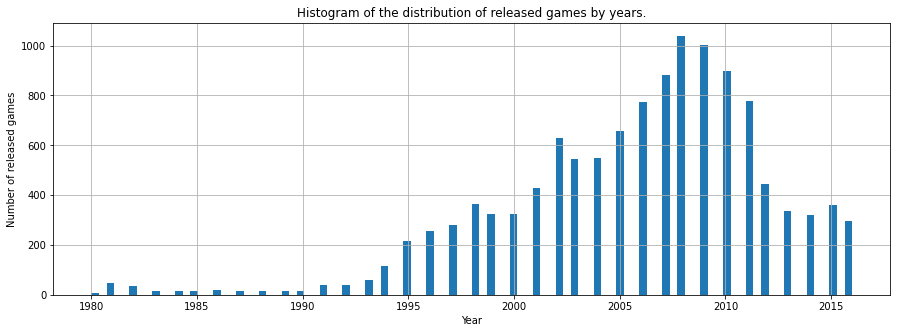

In [24]:
df[~df[['name', 'year_of_release']].duplicated()]['year_of_release'].plot(kind='hist', bins=100, figsize=(15,5), grid=True)
plt.xlabel('Year')
plt.ylabel('Number of released games')
plt.title('Histogram of the distribution of released games by years.');

Поведение графика хорошо описывают знаковые события в игроиндустрии и мире:
* Период подъема с 1994 года объясняется выпуском PS, которая запускала игры не с картриджей, а с CD-ROM-ов. 
* Следующий подъем 2001 года - интернет-бум.
* Спад с 2008 года - кризис.
Также стоит отметить, что датасет не включает в себя мобильный гейминг, который активно развивался в 10-х, что возможно объясняет последующий спад

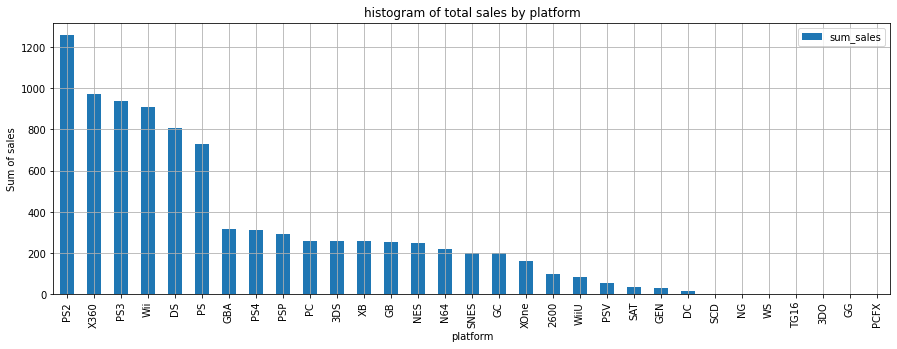

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [25]:
df_platforms_info = (df.pivot_table(values='sum_sales', index='platform', aggfunc='sum')
                     .sort_values(by='sum_sales', ascending=False)
)
df_platforms_info.plot(kind='bar', figsize=(15,5), grid=True)
plt.ylabel('Sum of sales')
plt.title('histogram of total sales by platform');
plt.show()
df_platforms_info.head(10)

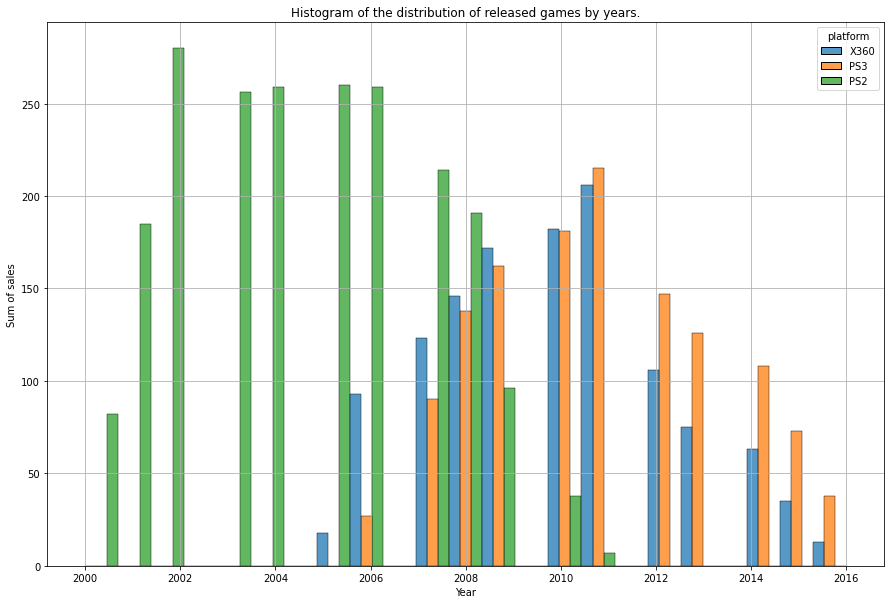

In [26]:
platforms_to_plot = df_platforms_info.loc['PS2':'PS3', 'sum_sales'].index.to_list()

sns.histplot(
    data=df.query('platform in @platforms_to_plot'),
    x='year_of_release', hue='platform', multiple="dodge"
)
plt.gcf().set_size_inches(15,10)
plt.xlabel('Year')
plt.ylabel('Sum of sales')
plt.title('Histogram of the distribution of released games by years.');
plt.grid(True)

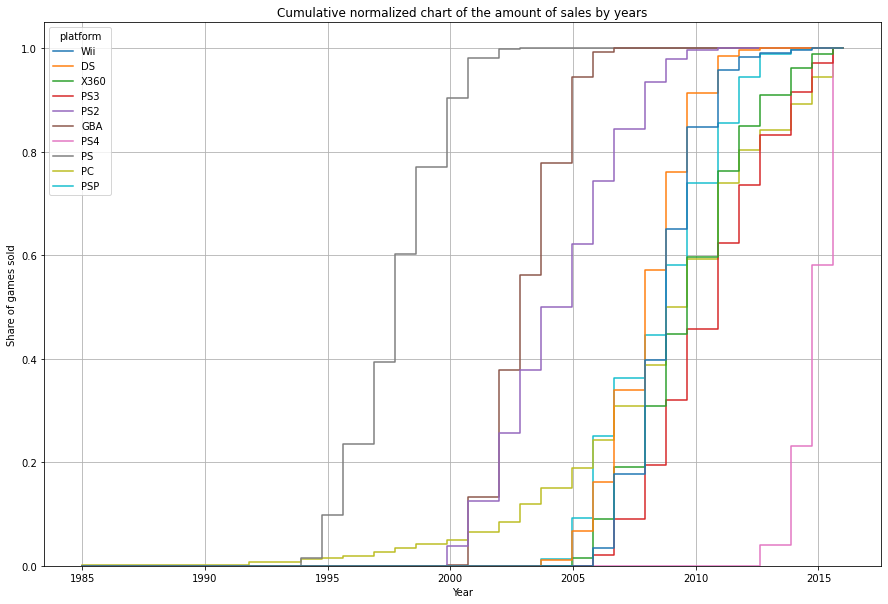

In [27]:
platforms_to_plot = df_platforms_info.loc['PS2':'PC', 'sum_sales'].index.to_list()
sns.histplot(
    data=df.query('platform in @platforms_to_plot'),
    x='year_of_release', hue='platform',
    element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)
plt.gcf().set_size_inches(15,10)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Share of games sold')
plt.title('Cumulative normalized chart of the amount of sales by years');

Все платформы кроме ПК актуальны в среднем 10 лет, значит, чтобы предсказать тенденцию на следующий год, будет достаточно статистики за предыдущие 5 лет. 

In [28]:
df_actual = df.query('year_of_release >= 2012')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   float64
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  sum_sales        2885 non-null   float64
dtypes: float64(8), object(4)
memory usage: 293.0+ KB


In [29]:
df_actual_platforms_by_years = df_actual.pivot_table(index='year_of_release',
                                                     columns='platform',
                                                     aggfunc='sum'
                                                    )['sum_sales']
df_actual_platforms_by_years

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


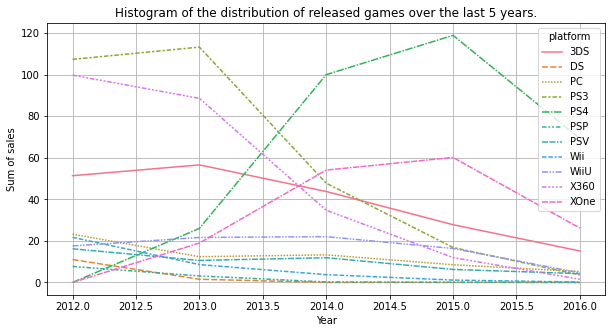

In [30]:
sns.lineplot(data=df_actual_platforms_by_years.fillna(0))
plt.xlabel('Year')
plt.ylabel('Sum of sales')
plt.title('Histogram of the distribution of released games over the last 5 years.')
plt.gcf().set_size_inches(10,5)
plt.grid(True);

Потенциально прибыльные платформы на 2017 год - PS4, X360 и 3DS

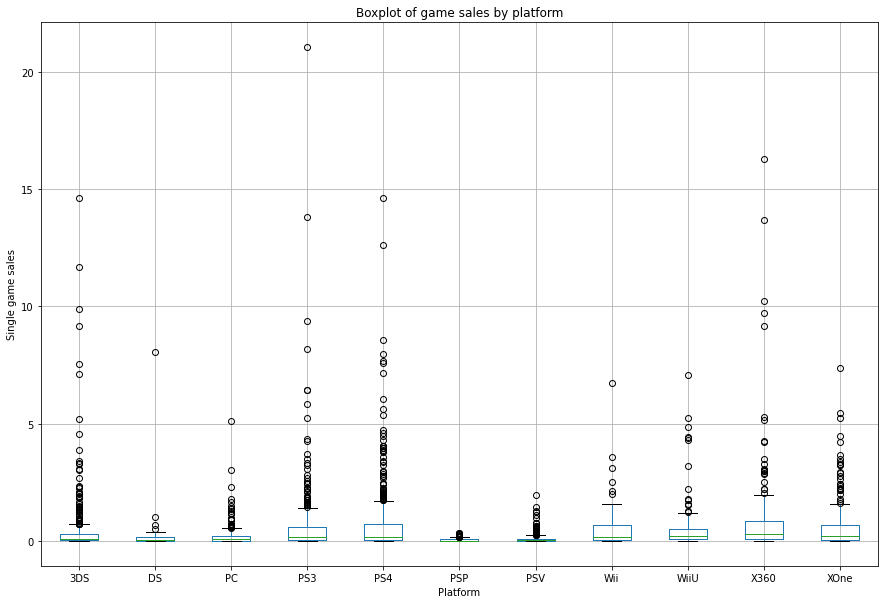

In [31]:
(
    df_actual
    .reset_index()
    .pivot_table(index='index', columns='platform', values='sum_sales')
    .plot(kind='box', figsize=(15,10), grid=True)
)
plt.xlabel('Platform')
plt.ylabel('Single game sales')
plt.title('Boxplot of game sales by platform');

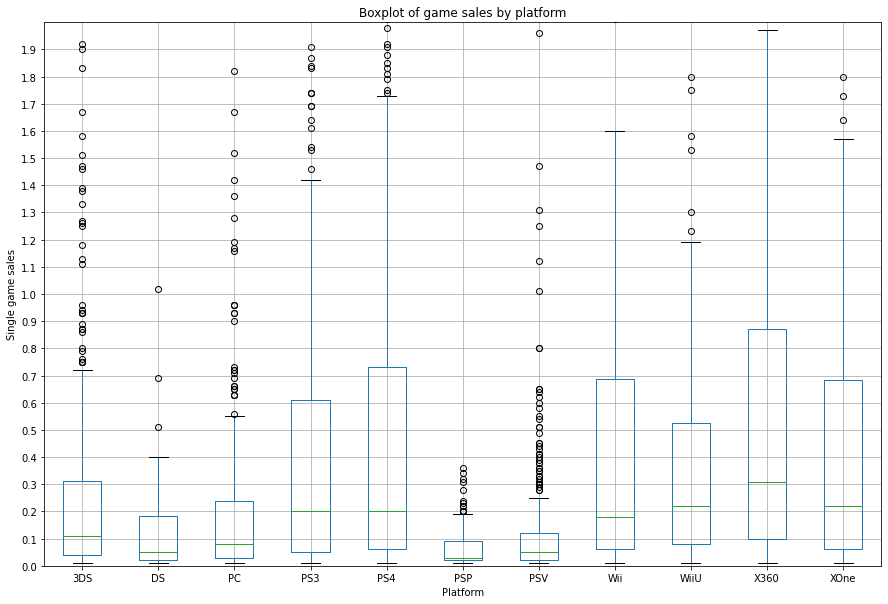

In [32]:
(
    df_actual
    .reset_index()
    .pivot_table(index='index', columns='platform', values='sum_sales')
    .plot(kind='box', figsize=(15,10), ylim=(0, 2), grid=True, yticks=np.arange(0, 2, 0.1))
)
plt.xlabel('Platform')
plt.ylabel('Single game sales')
plt.title('Boxplot of game sales by platform');

In [33]:
(
    df_actual
    .reset_index()
    .pivot_table(index='index', columns='platform', values='sum_sales')
    .describe()
    .style.format("{:,.3f}")
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,396.000,31.000,250.000,492.000,392.000,173.000,411.000,54.000,147.000,292.000,247.000
mean,0.491,0.405,0.251,0.587,0.801,0.065,0.120,0.655,0.559,0.810,0.645
std,1.387,1.439,0.495,1.464,1.609,0.071,0.203,1.165,1.059,1.712,1.036
min,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010
25%,0.040,0.020,0.030,0.050,0.060,0.020,0.020,0.062,0.080,0.100,0.060
50%,0.110,0.050,0.080,0.200,0.200,0.030,0.050,0.180,0.220,0.310,0.220
75%,0.313,0.185,0.240,0.610,0.730,0.090,0.120,0.688,0.525,0.870,0.685
max,14.600,8.060,5.140,21.050,14.630,0.360,1.960,6.760,7.090,16.270,7.390


На всех платформах есть смещение вправо по продажам, однако есть выделяющиеся и по этому параметру. 3DS, PS3, PS4, X360 имеют наибольшее смещение, а значит на них хорошие игры имеют шанс продаваться лучше, чем на других платформах.

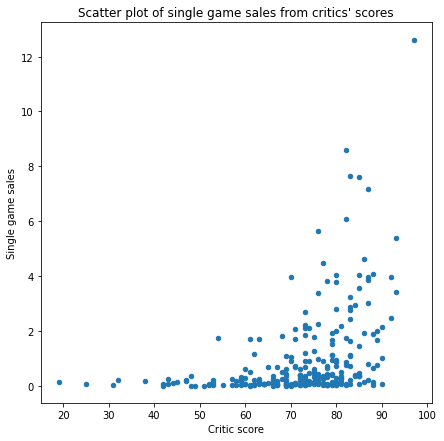

In [34]:
df_actual.query('platform == "PS4"').plot(kind='scatter', x='critic_score', y='sum_sales', alpha=1, figsize=(7,7))
plt.xlabel('Critic score')
plt.ylabel('Single game sales')
plt.title("Scatter plot of single game sales from critics' scores");

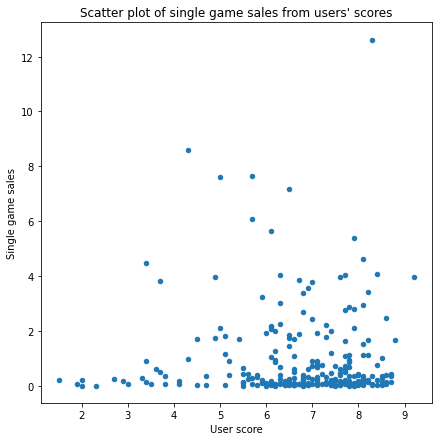

In [35]:
df_actual.query('platform == "PS4"').plot(kind='scatter', x='user_score', y='sum_sales', alpha=1, figsize=(7,7))
plt.xlabel('User score')
plt.ylabel('Single game sales')
plt.title("Scatter plot of single game sales from users' scores");

In [36]:
(
    df_actual
    .query('platform == "PS4"')
    .loc[:,['sum_sales', 'user_score', 'critic_score']]
    .corr()
    .style.format("{:,.3f}")
)

,sum_sales,user_score,critic_score
sum_sales,1.000,-0.032,0.407
user_score,-0.032,1.000,0.558
critic_score,0.407,0.558,1.000


Оценка критиков хорошо коррелирует с продажей игр: игры с отличной оценкой могут хорошо продаваться, с низкой - продаваться хорошо не могут.

Оценка пользователей не информативна, продажи не имеют тенденции возрастать вместе с рейтингом игроков.

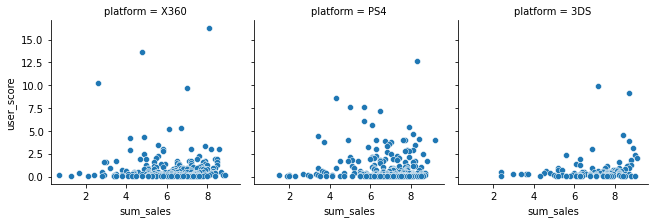

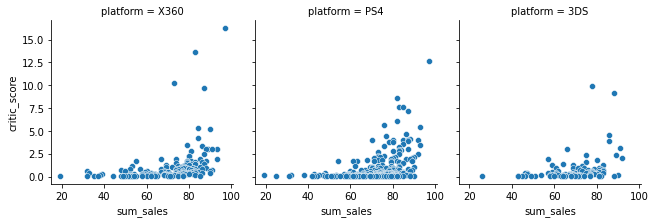

              sum_sales  user_score  critic_score
sum_sales      1.000000   -0.031957      0.406568
user_score    -0.031957    1.000000      0.557654
critic_score   0.406568    0.557654      1.000000
              sum_sales  user_score  critic_score
sum_sales      1.000000    0.006164      0.360573
user_score     0.006164    1.000000      0.557352
critic_score   0.360573    0.557352      1.000000
              sum_sales  user_score  critic_score
sum_sales      1.000000    0.197583      0.320803
user_score     0.197583    1.000000      0.722762
critic_score   0.320803    0.722762      1.000000


In [37]:
for col in ['user_score', 'critic_score']:
    fig = sns.FacetGrid(df_actual.query('platform in ["PS4", "X360", "3DS"]'), col="platform", margin_titles=True)
    fig.map_dataframe(sns.scatterplot, x=col, y='sum_sales')
    fig.set_axis_labels('sum_sales', col)
    plt.show();

for plat in ['PS4', 'X360','3DS']:
    print(
        df_actual
        .query('platform == @plat')
        .loc[:,['sum_sales', 'user_score', 'critic_score']]
        .corr()
    )

Вывод подтверждается на других популярных платформах

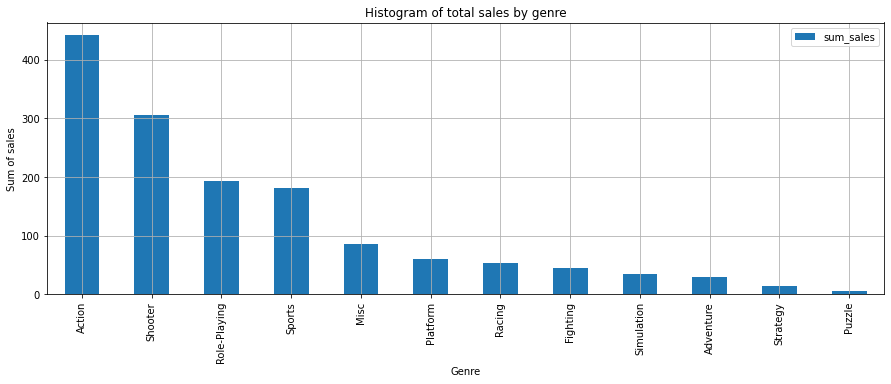

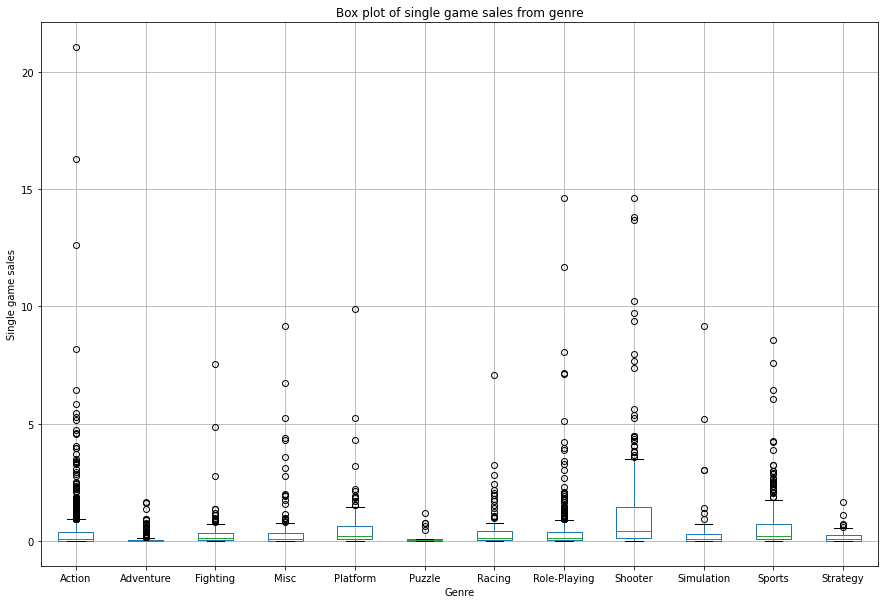

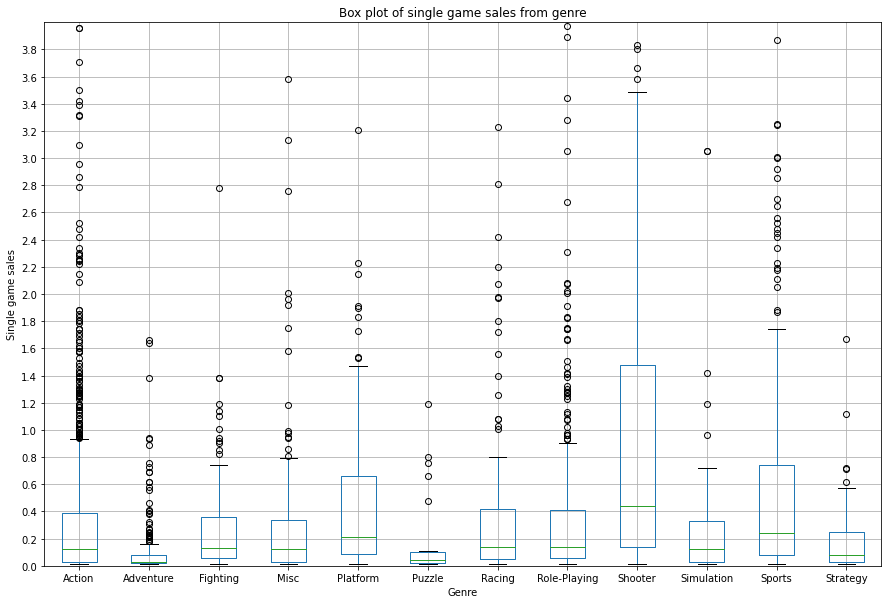

In [38]:
(
    df_actual
    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .plot(kind='bar', figsize=(15,5), grid=True)
)
plt.xlabel('Genre')
plt.ylabel('Sum of sales')
plt.title('Histogram of total sales by genre');

(
    df_actual
    .reset_index()
    .pivot_table(index='index', columns='genre', values='sum_sales')
    .plot(kind='box', figsize=(15,10), grid=True)
)
plt.xlabel('Genre')
plt.ylabel('Single game sales')
plt.title("Box plot of single game sales from genre");

(
    df_actual
    .reset_index()
    .pivot_table(index='index', columns='genre', values='sum_sales')
    .plot(kind='box', figsize=(15,10), grid=True, ylim=(0, 4), yticks=np.arange(0, 4, 0.2))
)
plt.xlabel('Genre')
plt.ylabel('Single game sales')
plt.title("Box plot of single game sales from genre");

Самые прибыльные жанры - экшен, шутер и роле-плей. Также, у них наибольшее смещение вправо, а значит хорошие игры этих жанров имеют шанс продаваться лучше, чем других.

**Вывод**

* Исходя из средней продолжительности популярности платформ в 10 лет определен актуальный период для анализа в 5 лет(это позволит точно оценить, платформа идет к своему пику популярности или, наоборот, уже ее теряет

* Исходя из общего числа продаж, потенциально прибыльные платформы на 2017 год - PS4, X360 и 3DS

* Для платформ 3DS, PS3, PS4, X360 наблюдается большое смещение вправо по продажам, а значит на них хорошие игры имеют шанс продаваться лучше, чем на других платформах.

* Оценка критиков, в отличие от оценки пользователей, хорошо коррелирует с продажей игр: игры с отличной оценкой могут хорошо продаваться, с низкой - продаваться хорошо не могут.

* Самые прибыльные жанры - экшен, шутер и роле-плей. Также, у них наибольшее смещение вправо по продажам, а значит хорошие игры этих жанров имеют шанс продаваться лучше, чем других.

### Портрет пользователя каждого региона

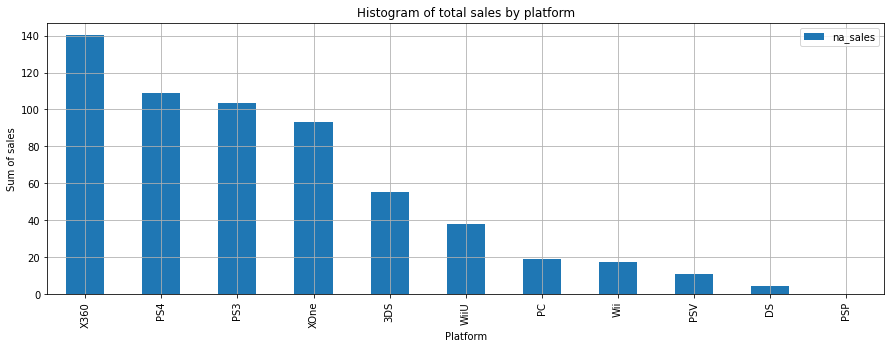

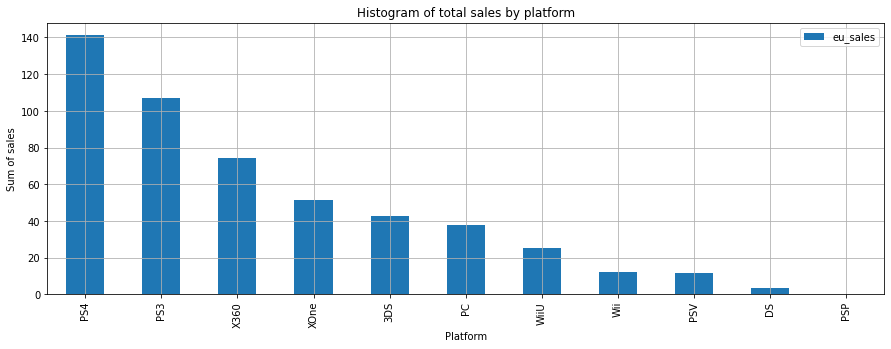

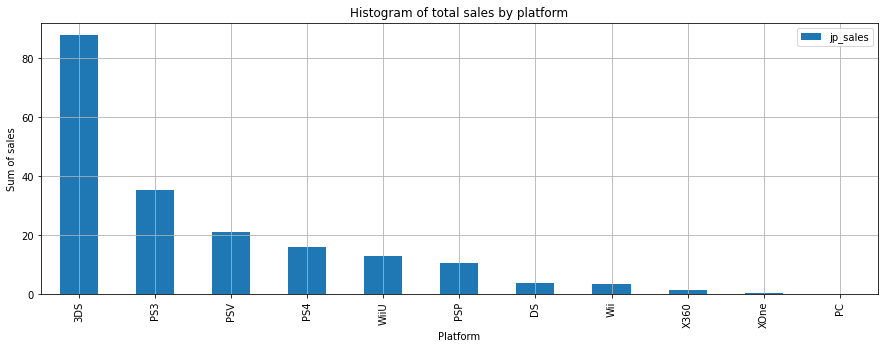

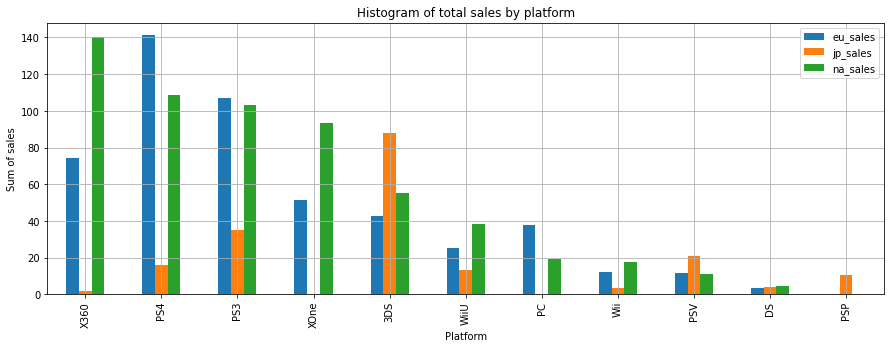

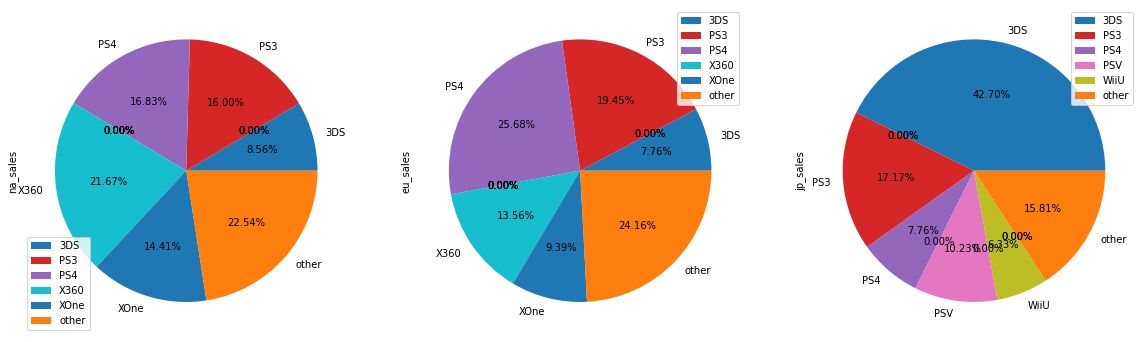

In [39]:
df_platforms_info = df_actual.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='platform', aggfunc='sum')
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    df_platforms_info.sort_values(by=reg, ascending=False).plot(kind='bar', figsize=(15,5), y=reg, grid=True)
    plt.xlabel('Platform')
    plt.ylabel('Sum of sales')
    plt.title('Histogram of total sales by platform')
    plt.show();

df_platforms_info.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,5), grid=True)
plt.xlabel('Platform')
plt.ylabel('Sum of sales')
plt.title('Histogram of total sales by platform')

df_platforms_info_fixed = pd.DataFrame(index=['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP',
                                              'PSV', 'Wii', 'WiiU', 'X360', 'XOne', 'other'])

for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    df_platforms_info_fixed[reg] = df_platforms_info.sort_values(by=reg, ascending=False)[:5][reg]
    df_platforms_info_fixed.loc['other', reg] = df_platforms_info.sort_values(by=reg, ascending=False)[4:][reg].sum()


df_platforms_info_fixed.plot(kind='pie', subplots=True, figsize=(20, 10), autopct='%1.2f%%')
plt.show()

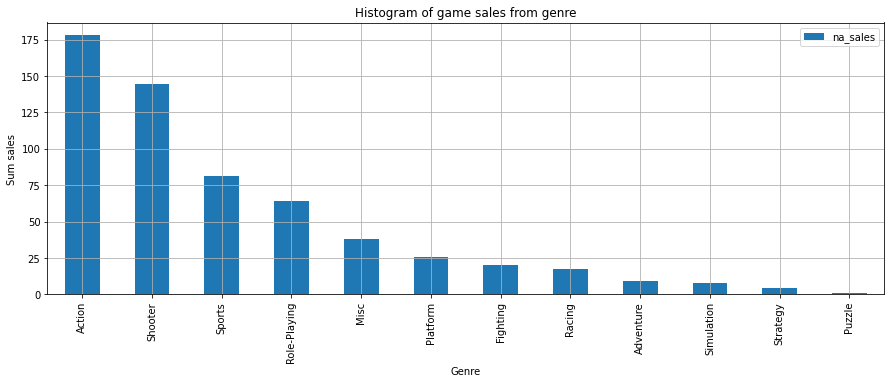

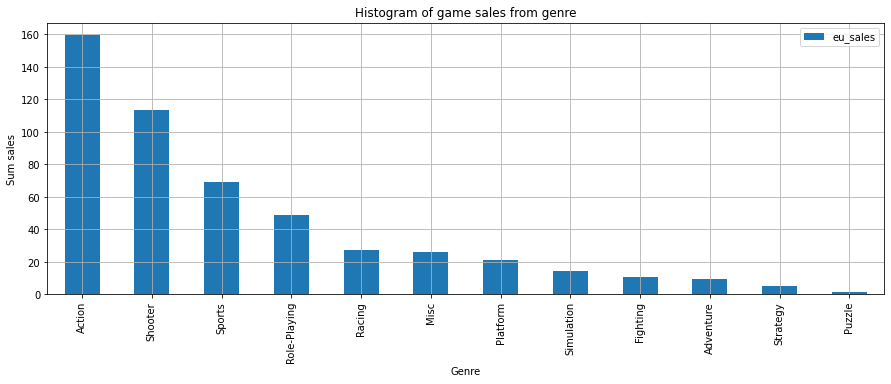

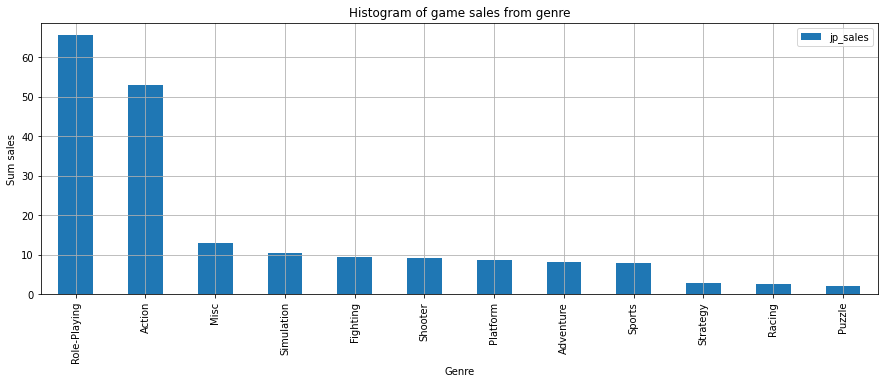

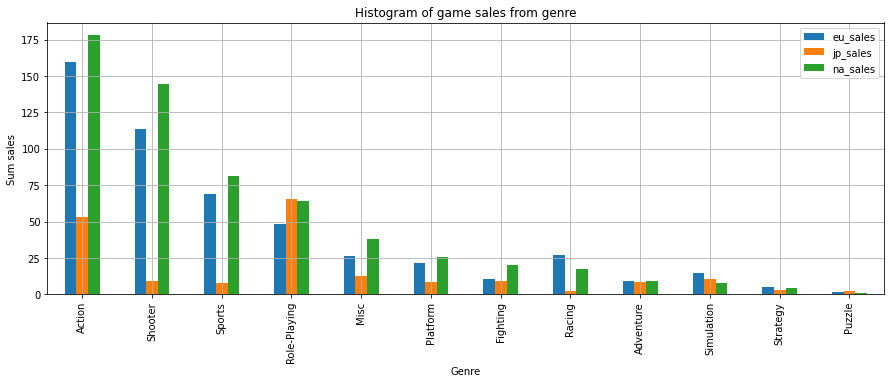

In [40]:
df_genre_info = df_actual.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='genre', aggfunc='sum')
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    df_genre_info.sort_values(by=reg, ascending=False).plot(kind='bar', figsize=(15,5), y=reg, grid=True)
    plt.xlabel('Genre')
    plt.ylabel('Sum sales')
    plt.title("Histogram of game sales from genre");

df_genre_info.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,5), grid=True)
plt.xlabel('Genre')
plt.ylabel('Sum sales')
plt.title("Histogram of game sales from genre");

* *Профиль европейцев и американцев весьма схож:* 

  Топ-5 платформ в Европе(доля):  PS4(26%), PS3(19%), X360(14%), XOne(8%), 3DS(8%).

  Топ-5 платформ в Америке(доля): X360(22%), PS4(17%), PS3(16%), XOne(14%), 3DS(9%).
  
  Топ-5 жанров в Европе: экшен, шутер, спорт, роле-плей, гонки
  
  Топ-5 жанров в Америке: экшен, шутер, спорт, роле-плей, аркада



* *Профиль японцев сильно отличается:*

  Топ-5 платформ в Японии(доля): 3DS(43%), PS3(17%), PSV(10%), PS4(8%), WiiU(6%)
  
  Топ-5 жанров в Японии: роле-плей, экшен, аркада, симулятор, файтинг
  
Такое радикальное различие в жанрах вполне объясняется абсолютно другой культурой Японии.

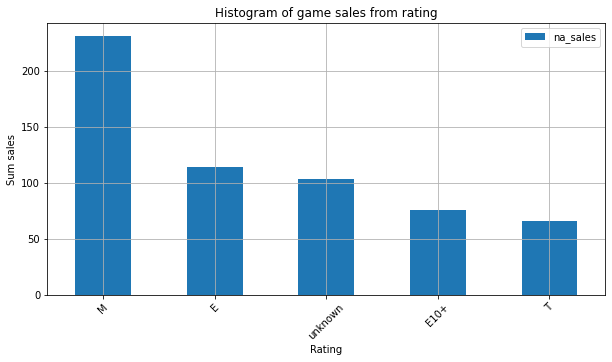

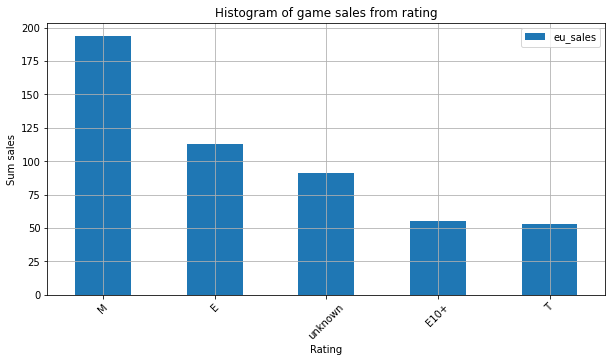

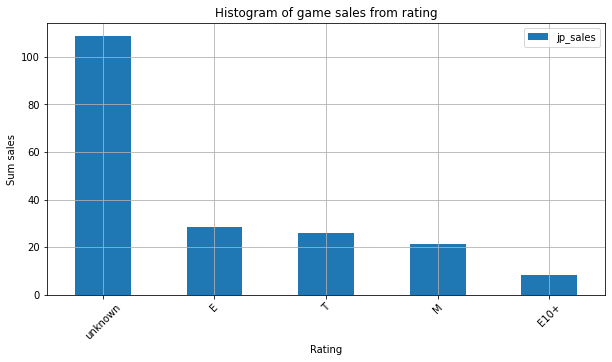

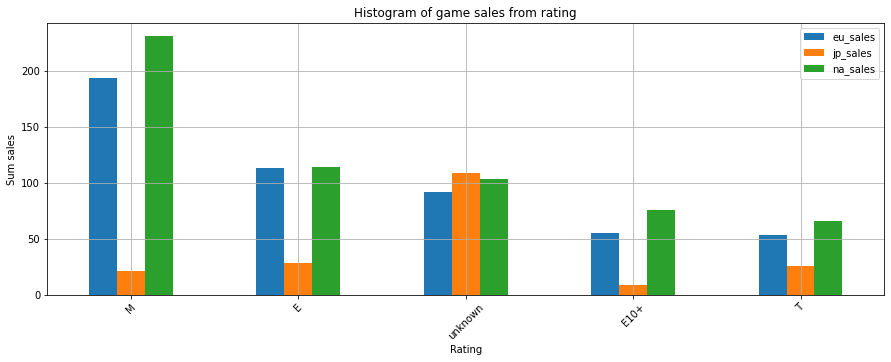

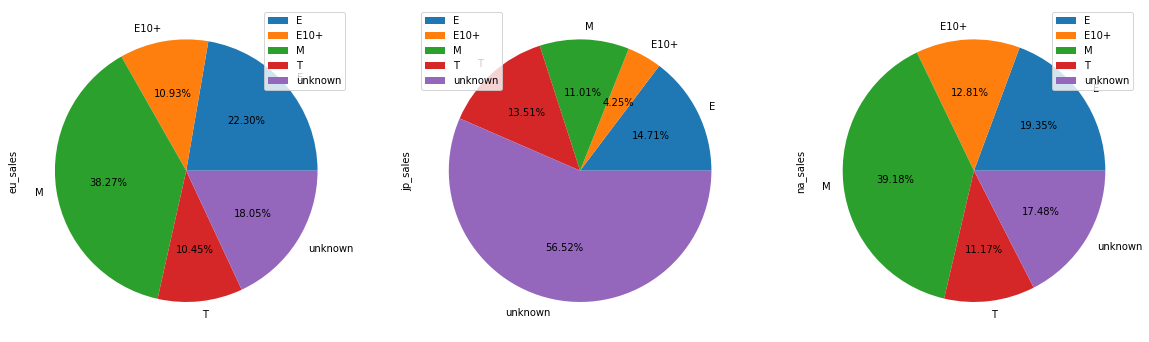

In [41]:
df_rating_info = df_actual.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='rating', aggfunc='sum')
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    df_rating_info.sort_values(by=reg, ascending=False).plot(kind='bar', figsize=(10,5), y=reg, rot=45, grid=True)
    plt.xlabel('Rating')
    plt.ylabel('Sum sales')
    plt.title("Histogram of game sales from rating");

df_rating_info.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,5), grid=True, rot=45)
plt.xlabel('Rating')
plt.ylabel('Sum sales')
plt.title("Histogram of game sales from rating");

df_rating_info.plot(kind='pie', subplots=True, figsize=(20, 10), autopct='%1.2f%%');

Возрастной рейтинг достаточно сильно влияет на продажи в разных регионах:
В Америке и Европе лучше всего продаются игры с рейтингом 17+(\~39%) и 14+(\~20%). В Японии c неизвестным рейтингом(57%) и 14+(15%).

Большое количество игр без рейтинга в Японии скорее всего объясняется большой долей японских игр, которые не всегда получают рейтинг ESRB, зато почти всегда получают местный рейтинг CERO

**Вывод**

Профиль европейцев и американцев весьма схож:

* Топ-5 платформ в Европе(доля): PS4(26%), PS3(19%), X360(14%), XOne(8%), 3DS(8%).

* Топ-5 платформ в Америке(доля): X360(22%), PS4(17%), PS3(16%), XOne(14%), 3DS(9%).

* Топ-5 жанров в Европе: экшен, шутер, спорт, роле-плей, гонки

* Топ-5 жанров в Америке: экшен, шутер, спорт, роле-плей, аркада

Профиль японцев сильно отличается:

* Топ-5 платформ в Японии(доля): 3DS(43%), PS3(17%), PSV(10%), PS4(8%), WiiU(6%)

* Топ-5 жанров в Японии: роле-плей, экшен, аркада, симулятор, файтинг

Также, в Америке и Европе предпочитают игры с рейтингом 17+(\~47%) и 14+(\~25%), а в Японии c неизвестным рейтингом(57%) и 14+(15%) (% от всех продаж). Большое количество игр без рейтинга в Японии скорее всего объясняется большой долей японских игр, которые не всегда получают рейтинг ESRB, зато почти всегда получают местный рейтинг CERO


### Провека гипотез

#### Проверка гипотезы о равенстве рейтингов игр на PC и XOne

H0 - рейтинги равны, H1 - рейтинги отличаются. 

Выборка, скорее всего, не самая полная, поэтому будем использовать t-тест для проверки гипотезы о равенстве среднего двух генеральных совокупностей по выборкам.

In [42]:
df_actual_for_h = df_actual.dropna(subset=['user_score'])
results = st.ttest_ind(
    df_actual_for_h.query('platform == "XOne"')['user_score'],
    df_actual_for_h.query('platform == "PC"')['user_score'],
    equal_var = False
)

alpha = 0.001
print('p-значение: ', results.pvalue, '\nalpha: ', alpha)
if results.pvalue < alpha:
    print('Отвергаем H0')
else:
    print("Не получилось отвергнуть H0")

p-значение:  0.5489537965134912 
alpha:  0.001
Не получилось отвергнуть H0


#### Проверка гипотезы о равенстве рейтингов жанров экшен и спорт

H0 - рейтинги не равны, H1 - рейтинги равны. 

Выборка, скорее всего, не самая полная, поэтому будем использовать t-тест для проверки гипотезы о равенстве среднего двух генеральных совокупностей по выборкам.

In [43]:
results = st.ttest_ind(
    df_actual_for_h.query('genre == "Action"')['user_score'],
    df_actual_for_h.query('genre == "Sports"')['user_score'],
    equal_var = False
)

alpha = 0.001
print('p-значение: ', 1 - results.pvalue, '\nalpha: ', alpha)
if 1 - results.pvalue < alpha:
    print('Отвергаем H0')
else:
    print("Не получилось отвергнуть H0")

p-значение:  1.0 
alpha:  0.001
Не получилось отвергнуть H0


### Вывод

**Технический**

* Обнаружены частые пропуски в колонках `user_score` и `critic_score`. Основная возможная причина пропусков в этих колонках - ранный выпуск этих игр (до 2000г), возможно рейтинги не собирались для столь старых игр. Для игр, которые выпускались после 2000г, причина неясна, судя по количествам продаж, есть весьма популярные игры без рейтинга.
* Причина пропусков в колонке `rating` скорее всего аналогична причине для `user_score`, тк многие игры без возрастного рейтинга не имеют рейтинга человеческого

**Бизнес**

* Исходя из средней продолжительности популярности платформ в 10 лет определен актуальный период для анализа в 5 лет(это позволит точно оценить, платформа идет к своему пику популярности или, наоборот, уже ее теряет

* Исходя из общего числа продаж, потенциально прибыльные платформы на 2017 год - PS4, X360 и 3DS

* Для платформ 3DS, PS3, PS4, X360 наблюдается большое смещение вправо по продажам, а значит на них хорошие игры имеют шанс продаваться лучше, чем на других платформах.

* Оценка критиков, в отличие от оценки пользователей, хорошо коррелирует с продажей игр: игры с отличной оценкой могут хорошо продаваться, с низкой - продаваться хорошо не могут.

* Самые прибыльные жанры - экшен, шутер и роле-плей. Также, у них наибольшее смещение вправо по продажам, а значит хорошие игры этих жанров имеют шанс продаваться лучше, чем других.

* *Профиль европейцев и американцев:* 

  Топ-5 платформ в Европе(доля):  PS4(26%), PS3(19%), X360(14%), XOne(8%), 3DS(8%).

  Топ-5 платформ в Америке(доля): X360(22%), PS4(17%), PS3(16%), XOne(14%), 3DS(9%).
  
  Топ-5 жанров в Европе: экшен, шутер, спорт, роле-плей, гонки
  
  Топ-5 жанров в Америке: экшен, шутер, спорт, роле-плей, аркада



* *Профиль японцев:*

  Топ-5 платформ в Японии(доля): 3DS(43%), PS3(17%), PSV(10%), PS4(8%), WiiU(6%)
  
  Топ-5 жанров в Японии: роле-плей, экшен, аркада, симулятор, файтинг
  
* В Америке и Европе лучше всего продаются игры с рейтингом 17+(\~47%) и 14+(\~25%), а в Японии c неизвестным рейтингом(57%) и 14+(15%) (% от всех продаж).

* Гипотеза о равенстве рейтингов игр для XOne и PC не может быть отвергнута

* Гипотеза о не равенстве рейтингов жанров экшен и спорт не может быть отвергнута